#  Implement SGD for linear regression

In [12]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [13]:
X = load_boston().data
Y = load_boston().target

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

### linear regression using sklearn 

In [15]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
clf = SGDRegressor()
clf.fit(X_train, Y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

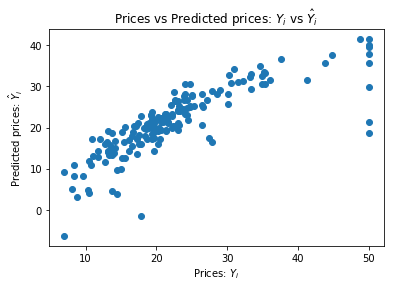

In [17]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
Y_pred = clf.predict(X_test)
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [18]:
sklearn_MSE = mean_squared_error(Y_test, clf.predict(X_test))
print("Mean squre error of sklearn implementation is:",sklearn_MSE)

Mean squre error of sklearn implementation is: 31.372886189428353


### Implementing Sgd using python data Science libraries

In [19]:
#code source:https://towardsdatascience.com/linear-regression-using-gradient-descent-in-10-lines-of-code-642f995339c0

from scipy.spatial import distance

def pred_yhat(X,weight_curr,bias_curr):
    return (X.dot(weight_curr)) + bias_curr

def linear_regression(X, y):
        weight_curr=0
        bias_curr=0
        batch_size=100
        epochs=1000
        learning_rate=1
        tol_=0.0001
        weight_curr=np.zeros(X.shape[1])
        bias_curr=0
        N = float(len(y))
        for i in range(epochs):
            weight_prev = weight_curr
            bias_prev = bias_curr
            index = np.random.randint(X.shape[0], size=batch_size)
            batch_data = X[index,:]
            batch_y = y[index]
            y_current = pred_yhat(batch_data,weight_curr,bias_curr)
            cost = sum([data**2 for data in (batch_y-y_current)]) / N
            weight_grad = -(2/N) * (batch_data.T).dot((batch_y - y_current))
            bias_grad = -(2/N) * (batch_y - y_current)
            weight_curr = weight_curr - (learning_rate/(i+1) * weight_grad)
            bias_curr = bias_curr - sum(learning_rate/(i+1) * bias_grad)
            w_diff = distance.euclidean(weight_prev,weight_curr)
            b_diff = bias_prev-bias_curr
            if w_diff < tol_ and b_diff < tol_:
                break
        return weight_curr, bias_curr, cost

In [20]:
fec_weights, intercept, train_MSE = linear_regression(X_train, Y_train)

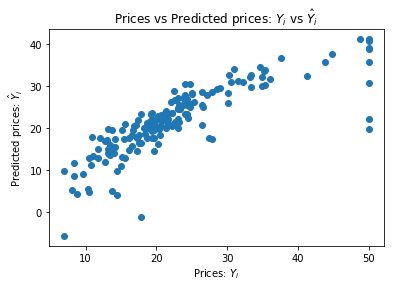

In [21]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
sgd_pred = pred_yhat(X_test,fec_weights,intercept)
plt.scatter(Y_test, sgd_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [22]:
imple_MSE = mean_squared_error(Y_test, sgd_pred)
print("Mean squre error of sklearn implementation is:",imple_MSE)

Mean squre error of sklearn implementation is: 30.21495856348857


### Conclusion

* obtained mean square error using sk-learn library on bostern home price data is 31.096499161448758
* obtained mean square error using own implementation of sgd is on bostern home price data is 30.0344087688197
* error value and predictions according to the above ploted graphs are almost same